# BASICS 01 - Spatiotemporal Surfaces

In [1]:
%load_ext autoreload
%autoreload 2
%cd '../HOTS'
%matplotlib inline

/home/INT/grimaldi.a/Documents/projets/HOTS/newhots/HOTS


In [2]:
import numpy as np
from timesurface import timesurface
import tonic, torch
import matplotlib.pyplot as plt

# Make a time surface from an event stream

In [3]:
transform = tonic.transforms.NumpyAsType(int)
learningset = tonic.datasets.NMNIST(save_to='../../Data/', train=True,transform=transform)
loader = torch.utils.data.DataLoader(learningset, shuffle=True)

In [4]:
events, target = next(iter(loader))

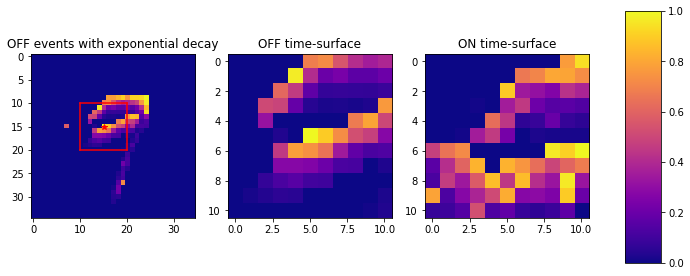

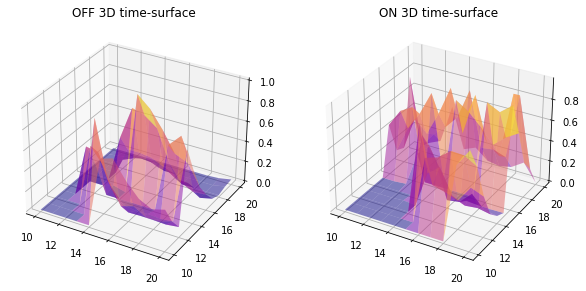

In [5]:
stop_indice = 2e3

x_index = learningset.ordering.index('x')
y_index = learningset.ordering.index('y')
t_index = learningset.ordering.index('t')
p_index = learningset.ordering.index('p')

target_event = stop_indice
R, tau, camsize, nbpol, sigma, decay = 5, 1e4, [34,34], 2, None, 'exponential'
SpTe = timesurface(R, tau, camsize, nbpol, sigma, decay)
iev = 0

events = events.squeeze()
while iev<target_event+1:
    P = np.zeros([nbpol])
    x, y, t, p = int(events[iev][x_index].item()), int(events[iev][y_index].item()), int(events[iev][t_index].item()), int(events[iev][p_index].item())
    TS = SpTe.addevent(x, y, t, p)
    iev+=1
    
SpTe.plote()

SpTe.plot3D()

# Make a time surface with tonic

In [6]:
tau = 2e3

transform = tonic.transforms.Compose([tonic.transforms.ToTimesurface(sensor_size=tonic.datasets.POKERDVS.sensor_size, tau=tau, decay='exp')])
learningset = tonic.datasets.NMNIST(save_to='../../Data/',train=True,transform=transform)
loader = torch.utils.data.DataLoader(learningset, shuffle=True)

In [7]:
time_surface, target = next(iter(loader))

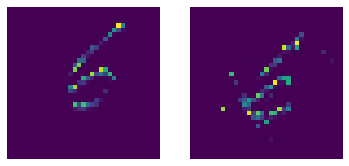

In [9]:
target_event = int(min(time_surface.shape[1]-1, stop_indice))

fig, axes = plt.subplots(1, time_surface.shape[2])
i = 0
for axis in axes:
    axis.imshow(time_surface.squeeze()[target_event,i,:,:])
    axis.axis("off")
    i+=1